<br /><h1 style="font-family:Impact,Arial;font-size:70px;">Law and Order: Crime in the USA 1996-2015</h1>
<h2 style="font-family:Arial;">Poya Heidari-shahi</h2>

Programming for Data Analysis</small></p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

# Abstract



The aim of this project is to analyse a dataset from the official fbi website containing statistics on different crimes that where committed in the United States of America between 1996-2015. The main goal of this project is to see what years had the most number of crimes comitted in that period and to study crime trends.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 1. Motivation



The main problem that this project will look at is how does crime in the USA change during the period 1996-2015. Specifically I wanted to look at whether the amount of crimes and crime rates would increase or decrease over time. The other goals that I wanted to meet are as follows:

1. Investigate laws affecting crime rates in USA
2. Investigate the amount of rape cases and the assosciated crime trend for the revised defnition and the legacy definition 
3. Investigate which crimes have decreased the most
4. Create subplots of all the crimes committed and crime rates
5. Estimate the number of rape cases under the revised definition for previous years
6. Find the top ten years for each crime 

This topic was interesting to me mainly due to my love of the television show "The Wire" which is crime drama where crime statistics play a significant role. The insight I was hoping to get from the data is what crimes are the most prevelant and what has caused the increase and decrease in crime.




<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 2. The data


This dataset was obtained from the offcial FBI website. It contains statistics on different crimes that where committed in the United States of America between 1996-2015. I choose it because it was related to crime statistics and it was all numerical meaning that data preporation would not be too difficult. To my knowledge there are no restrictions on the dataset. 

The dataset can be found on this link - https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-1
It is table 1.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 3. Data preparation

Code and comments on how the raw data is put in a usable form (i.e., how you go from the raw data set(s) to the dataframe you are using for the analysis).

__Create as many code, markdown and raw cells as needed__

First we need to import the neccessary packages that we need to use to analyse this dataset

In [1]:
from math import *
import numpy as np
import pandas as pd
import os
import random

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm 

Now we need to upload the actual dataset and convert it into a pandas dataframe.


In [2]:
!more ..\Prog Data 2017\table_1_crime_in_the_united_states_by_volume_and_rate_per_100000_inhabitants_1996-2015.xls

Cannot access file C:\Users\PoyaH\Google Drive\Prog


In [3]:
# Current working directory
current_dir = os.path.abspath(os.curdir)

# datasets directory from one level up.
dataset_dir = os.path.join(os.path.dirname(current_dir), 'Prog Data 2017')

# file name with complete path.
input_file = os.path.join(dataset_dir, 'table_1_crime_in_the_united_states_by_volume_and_rate_per_100000_inhabitants_1996-2015.xls')

data = pd.read_excel(input_file, sep=",", encoding='utf-8')

In [4]:
data = pd.read_excel(input_file, sep=",", encoding='utf-8')

Now that we have converted the excel file to a pandas dataframe, let's take a look at the dataframe to see if everythinng looks right.

In [5]:
data

,Table 1,,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Crime in the United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"by Volume and Rate per 100,000 Inhabitants, 19...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year,Population1,Violent\ncrime2,Violent \ncrime \nrate,Murder and\nnonnegligent \nmanslaughter,Murder and \nnonnegligent \nmanslaughter \nrate,Rape\n(revised\ndefinition)3,Rape\n(revised\ndefinition) rate3,Rape\n(legacy\ndefinition)4,Rape\n(legacy\ndefinition) rate4,...,Property \ncrime,Property \ncrime \nrate,Burglary,Burglary \nrate,Larceny-\ntheft,Larceny-\ntheft rate,Motor \nvehicle \ntheft,Motor \nvehicle \ntheft \nrate,NaN,NaN
3,1996,265228572,1688540,636.6,19645,7.4,NaN,NaN,96252,36.3,...,11805323,4451,2506400,945,7904685,2980.3,1394238,525.7,NaN,NaN
4,1997,267783607,1636096,611,18208,6.8,NaN,NaN,96153,35.9,...,11558475,4316.3,2460526,918.8,7743760,2891.8,1354189,505.7,NaN,NaN
5,1998,270248003,1533887,567.6,16974,6.3,NaN,NaN,93144,34.5,...,10951827,4052.5,2332735,863.2,7376311,2729.5,1242781,459.9,NaN,NaN
6,1999,272690813,1426044,523,15522,5.7,NaN,NaN,89411,32.8,...,10208334,3743.6,2100739,770.4,6955520,2550.7,1152075,422.5,,NaN
7,2000,281421906,1425486,506.5,15586,5.5,NaN,NaN,90178,32,...,10182584,3618.3,2050992,728.8,6971590,2477.3,1160002,412.2,NaN,NaN
8,20015,285317559,1439480,504.5,16037,5.6,NaN,NaN,90863,31.8,...,10437189,3658.1,2116531,741.8,7092267,2485.7,1228391,430.5,NaN,NaN
9,2002,287973924,1423677,494.4,16229,5.6,NaN,NaN,95235,33.1,...,10455277,3630.6,2151252,747,7057379,2450.7,1246646,432.9,NaN,NaN


This doesn't look right. What is meant to be the coloumn header is the third row of the dataframe. This is due to the first 3 rows consists of the text in the excel file. This is can easily be fixed.

In [6]:
data = pd.read_excel(input_file, sep=",", encoding='utf-8',skiprows=3) #creates dataframe from excel file while removing text from the first three rows

Let's see how it looks now.

In [7]:
data

,Year,Population1,Violent crime2,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition)3,Rape (revised definition) rate3,Rape (legacy definition)4,Rape (legacy definition) rate4,...,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate,Unnamed: 22,Unnamed: 23
0,1996,265228572.0,1688540.0,636.6,19645,7.4,NaN,NaN,96252.0,36.3,...,11805323.0,4451.0,2506400,945.0,7904685.0,2980.3,1394238.0,525.7,NaN,NaN
1,1997,267783607.0,1636096.0,611.0,18208,6.8,NaN,NaN,96153.0,35.9,...,11558475.0,4316.3,2460526,918.8,7743760.0,2891.8,1354189.0,505.7,NaN,NaN
2,1998,270248003.0,1533887.0,567.6,16974,6.3,NaN,NaN,93144.0,34.5,...,10951827.0,4052.5,2332735,863.2,7376311.0,2729.5,1242781.0,459.9,NaN,NaN
3,1999,272690813.0,1426044.0,523.0,15522,5.7,NaN,NaN,89411.0,32.8,...,10208334.0,3743.6,2100739,770.4,6955520.0,2550.7,1152075.0,422.5,,NaN
4,2000,281421906.0,1425486.0,506.5,15586,5.5,NaN,NaN,90178.0,32.0,...,10182584.0,3618.3,2050992,728.8,6971590.0,2477.3,1160002.0,412.2,NaN,NaN
5,20015,285317559.0,1439480.0,504.5,16037,5.6,NaN,NaN,90863.0,31.8,...,10437189.0,3658.1,2116531,741.8,7092267.0,2485.7,1228391.0,430.5,NaN,NaN
6,2002,287973924.0,1423677.0,494.4,16229,5.6,NaN,NaN,95235.0,33.1,...,10455277.0,3630.6,2151252,747.0,7057379.0,2450.7,1246646.0,432.9,NaN,NaN
7,2003,290788976.0,1383676.0,475.8,16528,5.7,NaN,NaN,93883.0,32.3,...,10442862.0,3591.2,2154834,741.0,7026802.0,2416.5,1261226.0,433.7,NaN,NaN
8,2004,293656842.0,1360088.0,463.2,16148,5.5,NaN,NaN,95089.0,32.4,...,10319386.0,3514.1,2144446,730.3,6937089.0,2362.3,1237851.0,421.5,,NaN
9,2005,296507061.0,1390745.0,469.0,16740,5.6,NaN,NaN,94347.0,31.8,...,10174754.0,3431.5,2155448,726.9,6783447.0,2287.8,1235859.0,416.8,NaN,


The top half looks great but the last few rows are non-sensical. We also need to remove two columns on the right. They are made up of more text from the excel file. This can be fixed by removing the last few rows and the last two column.

In [8]:
data = data[:20] #cuts of the bottom rows 
data

,Year,Population1,Violent crime2,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition)3,Rape (revised definition) rate3,Rape (legacy definition)4,Rape (legacy definition) rate4,...,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate,Unnamed: 22,Unnamed: 23
0,1996,265228572.0,1688540.0,636.6,19645,7.4,NaN,NaN,96252.0,36.3,...,11805323.0,4451.0,2506400,945.0,7904685.0,2980.3,1394238.0,525.7,NaN,NaN
1,1997,267783607.0,1636096.0,611.0,18208,6.8,NaN,NaN,96153.0,35.9,...,11558475.0,4316.3,2460526,918.8,7743760.0,2891.8,1354189.0,505.7,NaN,NaN
2,1998,270248003.0,1533887.0,567.6,16974,6.3,NaN,NaN,93144.0,34.5,...,10951827.0,4052.5,2332735,863.2,7376311.0,2729.5,1242781.0,459.9,NaN,NaN
3,1999,272690813.0,1426044.0,523.0,15522,5.7,NaN,NaN,89411.0,32.8,...,10208334.0,3743.6,2100739,770.4,6955520.0,2550.7,1152075.0,422.5,,NaN
4,2000,281421906.0,1425486.0,506.5,15586,5.5,NaN,NaN,90178.0,32.0,...,10182584.0,3618.3,2050992,728.8,6971590.0,2477.3,1160002.0,412.2,NaN,NaN
5,20015,285317559.0,1439480.0,504.5,16037,5.6,NaN,NaN,90863.0,31.8,...,10437189.0,3658.1,2116531,741.8,7092267.0,2485.7,1228391.0,430.5,NaN,NaN
6,2002,287973924.0,1423677.0,494.4,16229,5.6,NaN,NaN,95235.0,33.1,...,10455277.0,3630.6,2151252,747.0,7057379.0,2450.7,1246646.0,432.9,NaN,NaN
7,2003,290788976.0,1383676.0,475.8,16528,5.7,NaN,NaN,93883.0,32.3,...,10442862.0,3591.2,2154834,741.0,7026802.0,2416.5,1261226.0,433.7,NaN,NaN
8,2004,293656842.0,1360088.0,463.2,16148,5.5,NaN,NaN,95089.0,32.4,...,10319386.0,3514.1,2144446,730.3,6937089.0,2362.3,1237851.0,421.5,,NaN
9,2005,296507061.0,1390745.0,469.0,16740,5.6,NaN,NaN,94347.0,31.8,...,10174754.0,3431.5,2155448,726.9,6783447.0,2287.8,1235859.0,416.8,NaN,


In [9]:
data.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1, inplace=True) #removes the two columns on the right

C:\Users\PoyaH\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
data

,Year,Population1,Violent crime2,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition)3,Rape (revised definition) rate3,Rape (legacy definition)4,Rape (legacy definition) rate4,...,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1996,265228572.0,1688540.0,636.6,19645,7.4,NaN,NaN,96252.0,36.3,...,1037049.0,391.0,11805323.0,4451.0,2506400,945.0,7904685.0,2980.3,1394238.0,525.7
1,1997,267783607.0,1636096.0,611.0,18208,6.8,NaN,NaN,96153.0,35.9,...,1023201.0,382.1,11558475.0,4316.3,2460526,918.8,7743760.0,2891.8,1354189.0,505.7
2,1998,270248003.0,1533887.0,567.6,16974,6.3,NaN,NaN,93144.0,34.5,...,976583.0,361.4,10951827.0,4052.5,2332735,863.2,7376311.0,2729.5,1242781.0,459.9
3,1999,272690813.0,1426044.0,523.0,15522,5.7,NaN,NaN,89411.0,32.8,...,911740.0,334.3,10208334.0,3743.6,2100739,770.4,6955520.0,2550.7,1152075.0,422.5
4,2000,281421906.0,1425486.0,506.5,15586,5.5,NaN,NaN,90178.0,32.0,...,911706.0,324.0,10182584.0,3618.3,2050992,728.8,6971590.0,2477.3,1160002.0,412.2
5,20015,285317559.0,1439480.0,504.5,16037,5.6,NaN,NaN,90863.0,31.8,...,909023.0,318.6,10437189.0,3658.1,2116531,741.8,7092267.0,2485.7,1228391.0,430.5
6,2002,287973924.0,1423677.0,494.4,16229,5.6,NaN,NaN,95235.0,33.1,...,891407.0,309.5,10455277.0,3630.6,2151252,747.0,7057379.0,2450.7,1246646.0,432.9
7,2003,290788976.0,1383676.0,475.8,16528,5.7,NaN,NaN,93883.0,32.3,...,859030.0,295.4,10442862.0,3591.2,2154834,741.0,7026802.0,2416.5,1261226.0,433.7
8,2004,293656842.0,1360088.0,463.2,16148,5.5,NaN,NaN,95089.0,32.4,...,847381.0,288.6,10319386.0,3514.1,2144446,730.3,6937089.0,2362.3,1237851.0,421.5
9,2005,296507061.0,1390745.0,469.0,16740,5.6,NaN,NaN,94347.0,31.8,...,862220.0,290.8,10174754.0,3431.5,2155448,726.9,6783447.0,2287.8,1235859.0,416.8


Let's replace the N/A values with zeros.

In [11]:
data = data.fillna(0)
data

,Year,Population1,Violent crime2,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition)3,Rape (revised definition) rate3,Rape (legacy definition)4,Rape (legacy definition) rate4,...,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1996,265228572.0,1688540.0,636.6,19645,7.4,0,0.0,96252.0,36.3,...,1037049.0,391.0,11805323.0,4451.0,2506400,945.0,7904685.0,2980.3,1394238.0,525.7
1,1997,267783607.0,1636096.0,611.0,18208,6.8,0,0.0,96153.0,35.9,...,1023201.0,382.1,11558475.0,4316.3,2460526,918.8,7743760.0,2891.8,1354189.0,505.7
2,1998,270248003.0,1533887.0,567.6,16974,6.3,0,0.0,93144.0,34.5,...,976583.0,361.4,10951827.0,4052.5,2332735,863.2,7376311.0,2729.5,1242781.0,459.9
3,1999,272690813.0,1426044.0,523.0,15522,5.7,0,0.0,89411.0,32.8,...,911740.0,334.3,10208334.0,3743.6,2100739,770.4,6955520.0,2550.7,1152075.0,422.5
4,2000,281421906.0,1425486.0,506.5,15586,5.5,0,0.0,90178.0,32.0,...,911706.0,324.0,10182584.0,3618.3,2050992,728.8,6971590.0,2477.3,1160002.0,412.2
5,20015,285317559.0,1439480.0,504.5,16037,5.6,0,0.0,90863.0,31.8,...,909023.0,318.6,10437189.0,3658.1,2116531,741.8,7092267.0,2485.7,1228391.0,430.5
6,2002,287973924.0,1423677.0,494.4,16229,5.6,0,0.0,95235.0,33.1,...,891407.0,309.5,10455277.0,3630.6,2151252,747.0,7057379.0,2450.7,1246646.0,432.9
7,2003,290788976.0,1383676.0,475.8,16528,5.7,0,0.0,93883.0,32.3,...,859030.0,295.4,10442862.0,3591.2,2154834,741.0,7026802.0,2416.5,1261226.0,433.7
8,2004,293656842.0,1360088.0,463.2,16148,5.5,0,0.0,95089.0,32.4,...,847381.0,288.6,10319386.0,3514.1,2144446,730.3,6937089.0,2362.3,1237851.0,421.5
9,2005,296507061.0,1390745.0,469.0,16740,5.6,0,0.0,94347.0,31.8,...,862220.0,290.8,10174754.0,3431.5,2155448,726.9,6783447.0,2287.8,1235859.0,416.8


There are some cells which are blank. Let's create a method to fill empty cells with zeroes.

In [12]:
def recode_empty_cells(dataframe, list_of_columns): #this method iterates through the columns and replaces the cells containing empty strings with zeroes

    for column in list_of_columns:
      dataframe[column] = dataframe[column].replace(r'\s+', np.nan, regex=True)
      dataframe[column] = dataframe[column].fillna(0)

    return dataframe

In [13]:
recode_empty_cells(data, data.columns)

,Year,Population1,Violent crime2,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition)3,Rape (revised definition) rate3,Rape (legacy definition)4,Rape (legacy definition) rate4,...,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1996,265228572.0,1688540.0,636.6,19645,7.4,0.0,0.0,96252.0,36.3,...,1037049.0,391.0,11805323.0,4451.0,2506400,945.0,7904685.0,2980.3,1394238.0,525.7
1,1997,267783607.0,1636096.0,611.0,18208,6.8,0.0,0.0,96153.0,35.9,...,1023201.0,382.1,11558475.0,4316.3,2460526,918.8,7743760.0,2891.8,1354189.0,505.7
2,1998,270248003.0,1533887.0,567.6,16974,6.3,0.0,0.0,93144.0,34.5,...,976583.0,361.4,10951827.0,4052.5,2332735,863.2,7376311.0,2729.5,1242781.0,459.9
3,1999,272690813.0,1426044.0,523.0,15522,5.7,0.0,0.0,89411.0,32.8,...,911740.0,334.3,10208334.0,3743.6,2100739,770.4,6955520.0,2550.7,1152075.0,422.5
4,2000,281421906.0,1425486.0,506.5,15586,5.5,0.0,0.0,90178.0,32.0,...,911706.0,324.0,10182584.0,3618.3,2050992,728.8,6971590.0,2477.3,1160002.0,412.2
5,20015,285317559.0,1439480.0,504.5,16037,5.6,0.0,0.0,90863.0,31.8,...,909023.0,318.6,10437189.0,3658.1,2116531,741.8,7092267.0,2485.7,1228391.0,430.5
6,2002,287973924.0,1423677.0,494.4,16229,5.6,0.0,0.0,95235.0,33.1,...,891407.0,309.5,10455277.0,3630.6,2151252,747.0,7057379.0,2450.7,1246646.0,432.9
7,2003,290788976.0,1383676.0,475.8,16528,5.7,0.0,0.0,93883.0,32.3,...,859030.0,295.4,10442862.0,3591.2,2154834,741.0,7026802.0,2416.5,1261226.0,433.7
8,2004,293656842.0,1360088.0,463.2,16148,5.5,0.0,0.0,95089.0,32.4,...,847381.0,288.6,10319386.0,3514.1,2144446,730.3,6937089.0,2362.3,1237851.0,421.5
9,2005,296507061.0,1390745.0,469.0,16740,5.6,0.0,0.0,94347.0,31.8,...,862220.0,290.8,10174754.0,3431.5,2155448,726.9,6783447.0,2287.8,1235859.0,416.8


We need to remove the numbers from the column names and row names. 

In [14]:
#create list containing column and row indices and use the rename method to rename the columns and rows
column_indices = [1,2,6,7,8,9]
new_names = ['Population','Violent crime','Rape (revised definition)','Rape (revised definition) rate','Rape (legacy definition)','Rape (legacy definition) rate']
old_names = data.columns[column_indices]
data.rename(columns=dict(zip(old_names, new_names)), inplace=True)

Some of the years have extra numbers. Let's remove those as well.

In [15]:
data.ix[5,0] = 2001
data.ix[18,0]=2014

Let's quickly check the data types before we move forward.

In [16]:
data.dtypes

Year                                                 object
Population                                          float64
Violent crime                                       float64
Violent \ncrime \nrate                              float64
Murder and\nnonnegligent \nmanslaughter               int64
Murder and \nnonnegligent \nmanslaughter \nrate     float64
Rape (revised definition)                           float64
Rape (revised definition) rate                      float64
Rape (legacy definition)                            float64
Rape (legacy definition) rate                       float64
Robbery                                             float64
Robbery \nrate                                      float64
Aggravated \nassault                                float64
Aggravated \nassault rate                           float64
Property \ncrime                                    float64
Property \ncrime \nrate                             float64
Burglary                                

Let's change the data types of "Year", "Rape (revised definition)", "Burglary", 'Larceny-\ntheft rate' to the more appropriate data types.

In [17]:
data['Year'] = pd.to_datetime(data['Year'], format="%Y")
data['Rape (revised definition)']  = data['Rape (revised definition)'].astype('float64')
data['Burglary']  = data['Burglary'].astype('float64')
data['Larceny-\ntheft rate ']  = data['Larceny-\ntheft rate '].astype('float64')

In [18]:
data.dtypes

Year                                                datetime64[ns]
Population                                                 float64
Violent crime                                              float64
Violent \ncrime \nrate                                     float64
Murder and\nnonnegligent \nmanslaughter                      int64
Murder and \nnonnegligent \nmanslaughter \nrate            float64
Rape (revised definition)                                  float64
Rape (revised definition) rate                             float64
Rape (legacy definition)                                   float64
Rape (legacy definition) rate                              float64
Robbery                                                    float64
Robbery \nrate                                             float64
Aggravated \nassault                                       float64
Aggravated \nassault rate                                  float64
Property \ncrime                                           flo

Everything should look right now. The coloumns 'Rape (revised definition)' and "Rape (revised definition rate) require N/A values as they are only relevant from 2013 onwards.

In [19]:
data

,Year,Population,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition),Rape (revised definition) rate,Rape (legacy definition),Rape (legacy definition) rate,...,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1996-01-01,265228572.0,1688540.0,636.6,19645,7.4,0.0,0.0,96252.0,36.3,...,1037049.0,391.0,11805323.0,4451.0,2506400.0,945.0,7904685.0,2980.3,1394238.0,525.7
1,1997-01-01,267783607.0,1636096.0,611.0,18208,6.8,0.0,0.0,96153.0,35.9,...,1023201.0,382.1,11558475.0,4316.3,2460526.0,918.8,7743760.0,2891.8,1354189.0,505.7
2,1998-01-01,270248003.0,1533887.0,567.6,16974,6.3,0.0,0.0,93144.0,34.5,...,976583.0,361.4,10951827.0,4052.5,2332735.0,863.2,7376311.0,2729.5,1242781.0,459.9
3,1999-01-01,272690813.0,1426044.0,523.0,15522,5.7,0.0,0.0,89411.0,32.8,...,911740.0,334.3,10208334.0,3743.6,2100739.0,770.4,6955520.0,2550.7,1152075.0,422.5
4,2000-01-01,281421906.0,1425486.0,506.5,15586,5.5,0.0,0.0,90178.0,32.0,...,911706.0,324.0,10182584.0,3618.3,2050992.0,728.8,6971590.0,2477.3,1160002.0,412.2
5,2001-01-01,285317559.0,1439480.0,504.5,16037,5.6,0.0,0.0,90863.0,31.8,...,909023.0,318.6,10437189.0,3658.1,2116531.0,741.8,7092267.0,2485.7,1228391.0,430.5
6,2002-01-01,287973924.0,1423677.0,494.4,16229,5.6,0.0,0.0,95235.0,33.1,...,891407.0,309.5,10455277.0,3630.6,2151252.0,747.0,7057379.0,2450.7,1246646.0,432.9
7,2003-01-01,290788976.0,1383676.0,475.8,16528,5.7,0.0,0.0,93883.0,32.3,...,859030.0,295.4,10442862.0,3591.2,2154834.0,741.0,7026802.0,2416.5,1261226.0,433.7
8,2004-01-01,293656842.0,1360088.0,463.2,16148,5.5,0.0,0.0,95089.0,32.4,...,847381.0,288.6,10319386.0,3514.1,2144446.0,730.3,6937089.0,2362.3,1237851.0,421.5
9,2005-01-01,296507061.0,1390745.0,469.0,16740,5.6,0.0,0.0,94347.0,31.8,...,862220.0,290.8,10174754.0,3431.5,2155448.0,726.9,6783447.0,2287.8,1235859.0,416.8


<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 4. Exploratory data analysis

This is the main part of the project. Include code, plots, and detailed explanation of your analysis of the data. Be sure to include enough detail so that anyone can follow and understand what you are doing.

__Create as many code, markdown and raw cells as needed__

Firstly let's have look at which year has the highest amount of crime. In order to calculate this we need to add a new columnn called "Total Crimes".

In [20]:
#make a list of the columns we want to add 
# we need to remove all the rates as well


col_list= list(data)
col_list.remove('Population')
col_list.remove('Year')     


     
col_list

['Violent crime',
 'Violent \ncrime \nrate ',
 'Murder and\nnonnegligent \nmanslaughter',
 'Murder and \nnonnegligent \nmanslaughter \nrate ',
 'Rape (revised definition)',
 'Rape (revised definition) rate',
 'Rape (legacy definition)',
 'Rape (legacy definition) rate',
 'Robbery',
 'Robbery \nrate ',
 'Aggravated \nassault',
 'Aggravated \nassault rate ',
 'Property \ncrime',
 'Property \ncrime \nrate ',
 'Burglary',
 'Burglary \nrate ',
 'Larceny-\ntheft',
 'Larceny-\ntheft rate ',
 'Motor \nvehicle \ntheft',
 'Motor \nvehicle \ntheft \nrate ']

In [21]:
for col in col_list: #removes rates from the list
     if 'rate' in col:
        col_list.remove(col)
        
col_list


['Violent crime',
 'Murder and\nnonnegligent \nmanslaughter',
 'Rape (revised definition)',
 'Rape (legacy definition)',
 'Robbery',
 'Aggravated \nassault',
 'Property \ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor \nvehicle \ntheft']

In [22]:
#creates new column adding together all the necessary coloumns to find the total for each year
data['Total Crime'] = data[col_list].sum(axis=1)

In [23]:
data

,Year,Population,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition),Rape (revised definition) rate,Rape (legacy definition),Rape (legacy definition) rate,...,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate,Total Crime
0,1996-01-01,265228572.0,1688540.0,636.6,19645,7.4,0.0,0.0,96252.0,36.3,...,391.0,11805323.0,4451.0,2506400.0,945.0,7904685.0,2980.3,1394238.0,525.7,26987726.0
1,1997-01-01,267783607.0,1636096.0,611.0,18208,6.8,0.0,0.0,96153.0,35.9,...,382.1,11558475.0,4316.3,2460526.0,918.8,7743760.0,2891.8,1354189.0,505.7,26389142.0
2,1998-01-01,270248003.0,1533887.0,567.6,16974,6.3,0.0,0.0,93144.0,34.5,...,361.4,10951827.0,4052.5,2332735.0,863.2,7376311.0,2729.5,1242781.0,459.9,24971428.0
3,1999-01-01,272690813.0,1426044.0,523.0,15522,5.7,0.0,0.0,89411.0,32.8,...,334.3,10208334.0,3743.6,2100739.0,770.4,6955520.0,2550.7,1152075.0,422.5,23268756.0
4,2000-01-01,281421906.0,1425486.0,506.5,15586,5.5,0.0,0.0,90178.0,32.0,...,324.0,10182584.0,3618.3,2050992.0,728.8,6971590.0,2477.3,1160002.0,412.2,23216140.0
5,2001-01-01,285317559.0,1439480.0,504.5,16037,5.6,0.0,0.0,90863.0,31.8,...,318.6,10437189.0,3658.1,2116531.0,741.8,7092267.0,2485.7,1228391.0,430.5,23753338.0
6,2002-01-01,287973924.0,1423677.0,494.4,16229,5.6,0.0,0.0,95235.0,33.1,...,309.5,10455277.0,3630.6,2151252.0,747.0,7057379.0,2450.7,1246646.0,432.9,23757908.0
7,2003-01-01,290788976.0,1383676.0,475.8,16528,5.7,0.0,0.0,93883.0,32.3,...,295.4,10442862.0,3591.2,2154834.0,741.0,7026802.0,2416.5,1261226.0,433.7,23653076.0
8,2004-01-01,293656842.0,1360088.0,463.2,16148,5.5,0.0,0.0,95089.0,32.4,...,288.6,10319386.0,3514.1,2144446.0,730.3,6937089.0,2362.3,1237851.0,421.5,23358948.0
9,2005-01-01,296507061.0,1390745.0,469.0,16740,5.6,0.0,0.0,94347.0,31.8,...,290.8,10174754.0,3431.5,2155448.0,726.9,6783447.0,2287.8,1235859.0,416.8,23130998.0


Before we can analyse the total amount of crimes committed for each year we should also create a column for the total crime rate

In [24]:
#creates new column "Total Crime Rate" using the formula that the fbi uses for calculating crime rates.
data['Total Crime Rate'] = ((data['Total Crime']/data['Population'])*100000)
data

,Year,Population,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition),Rape (revised definition) rate,Rape (legacy definition),Rape (legacy definition) rate,...,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate,Total Crime,Total Crime Rate
0,1996-01-01,265228572.0,1688540.0,636.6,19645,7.4,0.0,0.0,96252.0,36.3,...,11805323.0,4451.0,2506400.0,945.0,7904685.0,2980.3,1394238.0,525.7,26987726.0,10175.271011
1,1997-01-01,267783607.0,1636096.0,611.0,18208,6.8,0.0,0.0,96153.0,35.9,...,11558475.0,4316.3,2460526.0,918.8,7743760.0,2891.8,1354189.0,505.7,26389142.0,9854.651782
2,1998-01-01,270248003.0,1533887.0,567.6,16974,6.3,0.0,0.0,93144.0,34.5,...,10951827.0,4052.5,2332735.0,863.2,7376311.0,2729.5,1242781.0,459.9,24971428.0,9240.189649
3,1999-01-01,272690813.0,1426044.0,523.0,15522,5.7,0.0,0.0,89411.0,32.8,...,10208334.0,3743.6,2100739.0,770.4,6955520.0,2550.7,1152075.0,422.5,23268756.0,8533.017942
4,2000-01-01,281421906.0,1425486.0,506.5,15586,5.5,0.0,0.0,90178.0,32.0,...,10182584.0,3618.3,2050992.0,728.8,6971590.0,2477.3,1160002.0,412.2,23216140.0,8249.585233
5,2001-01-01,285317559.0,1439480.0,504.5,16037,5.6,0.0,0.0,90863.0,31.8,...,10437189.0,3658.1,2116531.0,741.8,7092267.0,2485.7,1228391.0,430.5,23753338.0,8325.228242
6,2002-01-01,287973924.0,1423677.0,494.4,16229,5.6,0.0,0.0,95235.0,33.1,...,10455277.0,3630.6,2151252.0,747.0,7057379.0,2450.7,1246646.0,432.9,23757908.0,8250.020582
7,2003-01-01,290788976.0,1383676.0,475.8,16528,5.7,0.0,0.0,93883.0,32.3,...,10442862.0,3591.2,2154834.0,741.0,7026802.0,2416.5,1261226.0,433.7,23653076.0,8134.103406
8,2004-01-01,293656842.0,1360088.0,463.2,16148,5.5,0.0,0.0,95089.0,32.4,...,10319386.0,3514.1,2144446.0,730.3,6937089.0,2362.3,1237851.0,421.5,23358948.0,7954.504939
9,2005-01-01,296507061.0,1390745.0,469.0,16740,5.6,0.0,0.0,94347.0,31.8,...,10174754.0,3431.5,2155448.0,726.9,6783447.0,2287.8,1235859.0,416.8,23130998.0,7801.162617


Now that we added the two columns we can create a graph to see which year had the highest and least amount of crime!

In [25]:
total_crimes = data.pivot_table('Total Crime', index='Year', aggfunc=sum)
total_crimes.head()

Year
1996-01-01    26987726.0
1997-01-01    26389142.0
1998-01-01    24971428.0
1999-01-01    23268756.0
2000-01-01    23216140.0
Name: Total Crime, dtype: float64

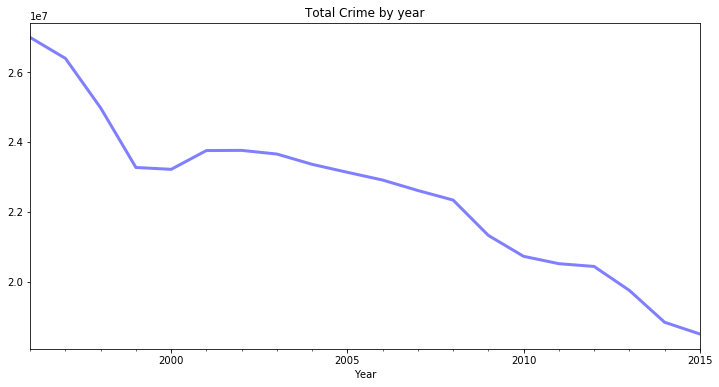

In [26]:
total_crimes_plot=total_crimes.plot(figsize=(12, 6), title="Total Crime by year", lw=3, color=( 'b'), alpha=0.5, )

It looks like 1996 has the most of amount of crimes occuring, while 2015 has the least. Let's get a pie chart of both years to see which crimes are the most prevelant for each year. Note that the occurance of crimes being commited had a steep drop in the mid 90s to 2000 and from there has had a more steady decrease.

First we'll do a pie chart for crime in 1996


In [27]:
data.iloc[0] #list of values for 1996

Year                                                1996-01-01 00:00:00
Population                                                  2.65229e+08
Violent crime                                               1.68854e+06
Violent \ncrime \nrate                                            636.6
Murder and\nnonnegligent \nmanslaughter                           19645
Murder and \nnonnegligent \nmanslaughter \nrate                     7.4
Rape (revised definition)                                             0
Rape (revised definition) rate                                        0
Rape (legacy definition)                                          96252
Rape (legacy definition) rate                                      36.3
Robbery                                                          535594
Robbery \nrate                                                    201.9
Aggravated \nassault                                        1.03705e+06
Aggravated \nassault rate                                       

In [28]:
#creates list from values
sizes1996 = data.iloc[0].values.tolist()
sizes1996

[Timestamp('1996-01-01 00:00:00'),
 265228572.0,
 1688540.0,
 636.60000000000002,
 19645,
 7.4000000000000004,
 0.0,
 0.0,
 96252.0,
 36.299999999999997,
 535594.0,
 201.90000000000001,
 1037049.0,
 391.0,
 11805323.0,
 4451.0,
 2506400.0,
 945.0,
 7904685.0,
 2980.3000000000002,
 1394238.0,
 525.70000000000005,
 26987726.0,
 10175.271011148829]

In [29]:
sizes1996=sizes1996[2:-2:2] #trims population and rates from list
sizes1996

[1688540.0,
 19645,
 0.0,
 96252.0,
 535594.0,
 1037049.0,
 11805323.0,
 2506400.0,
 7904685.0,
 1394238.0]

In [30]:
labels = col_list #creates labels using column names
labels

['Violent crime',
 'Murder and\nnonnegligent \nmanslaughter',
 'Rape (revised definition)',
 'Rape (legacy definition)',
 'Robbery',
 'Aggravated \nassault',
 'Property \ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor \nvehicle \ntheft']

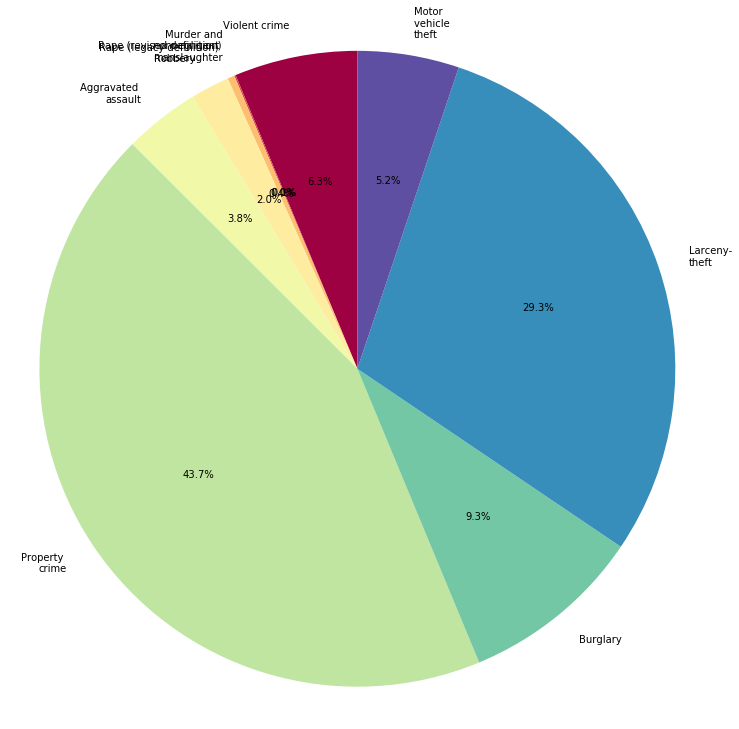

In [31]:
colors = np.linspace(0, 1, len(labels))




plt.figure(figsize=(10,10))
plt.pie(
    # using data total number of crimes comitted
    sizes1996,
    # with the labels being crimes comitted
    labels=labels,
    # with no shadows
    shadow=False,
    # with colors
    colors=cm.Spectral(colors),
    # with one slide exploded out
   # explode=sizes,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

plt.axis('equal')

plt.tight_layout()
plt.show()

It looks like property crime was the most comitted crime in 1996 closely followed by larceny-theft. The more aggressive crimes such as murder are only a small portion of the total crimes for this year.

Let's repeat the same process for 2015 and compare the results

In [32]:
data.iloc[19]

Year                                                2015-01-01 00:00:00
Population                                                  3.21419e+08
Violent crime                                                1.1977e+06
Violent \ncrime \nrate                                            372.6
Murder and\nnonnegligent \nmanslaughter                           15696
Murder and \nnonnegligent \nmanslaughter \nrate                     4.9
Rape (revised definition)                                        124047
Rape (revised definition) rate                                     38.6
Rape (legacy definition)                                          90185
Rape (legacy definition) rate                                      28.1
Robbery                                                          327374
Robbery \nrate                                                    101.9
Aggravated \nassault                                             764449
Aggravated \nassault rate                                       

In [33]:
sizes2015 = data.iloc[19].values.tolist()
sizes2015

[Timestamp('2015-01-01 00:00:00'),
 321418820.0,
 1197704.0,
 372.60000000000002,
 15696,
 4.9000000000000004,
 124047.0,
 38.600000000000001,
 90185.0,
 28.100000000000001,
 327374.0,
 101.90000000000001,
 764449.0,
 237.80000000000001,
 7993631.0,
 2487.0,
 1579527.0,
 491.39999999999998,
 5706346.0,
 1775.4000000000001,
 707758.0,
 220.19999999999999,
 18506717.0,
 5757.8199683515732]

In [34]:
sizes2015 = sizes2015[2:-2:2] #trims population and rates from list
sizes2015

[1197704.0,
 15696,
 124047.0,
 90185.0,
 327374.0,
 764449.0,
 7993631.0,
 1579527.0,
 5706346.0,
 707758.0]

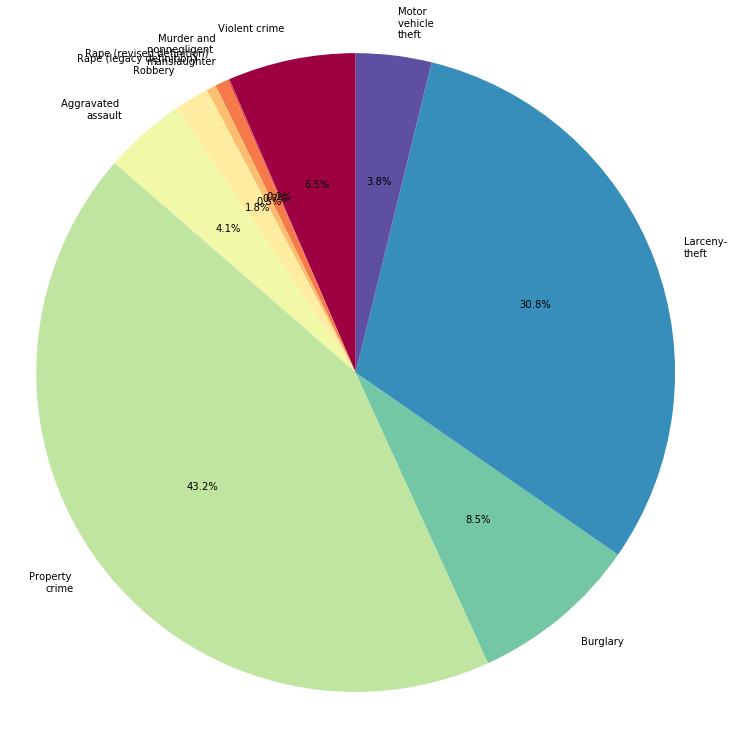

In [35]:
colors = np.linspace(0, 1, len(labels))




plt.figure(figsize=(10,10))
plt.pie(
    # using data total number of crimes comitted
    sizes2015,
    # with the labels being crimes comitted
    labels=labels,
    # with no shadows
    shadow=False,
    # with colors
    colors=cm.Spectral(colors),
    # with one slide exploded out
   # explode=sizes,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

plt.axis('equal')

plt.tight_layout()
plt.show()

The results here are very similar to those of 1996. It seems while crime has decreased the proportion of the crimes comitted are still the very much the same.

Now that we have had a look at the total amount of crimes comitted during 1996-2015. However we haven't looked at the total crime rate. This will provide a more accurate picture of how crime has changed over the years as it takes population into account.

In [36]:
total_crimes_rate = data.pivot_table('Total Crime Rate', index='Year', aggfunc=sum)
total_crimes_rate.head()

Year
1996-01-01    10175.271011
1997-01-01     9854.651782
1998-01-01     9240.189649
1999-01-01     8533.017942
2000-01-01     8249.585233
Name: Total Crime Rate, dtype: float64

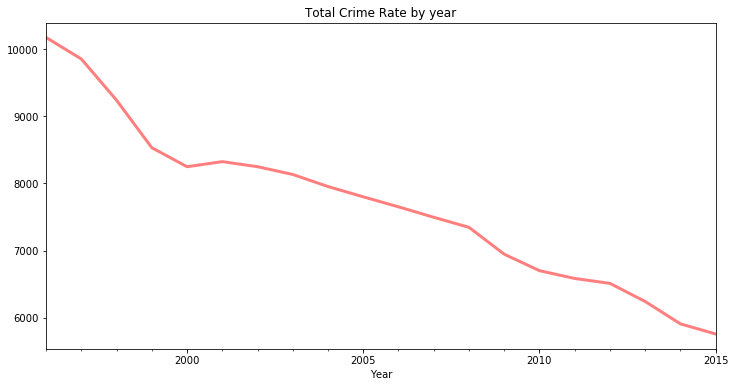

In [37]:
total_crimes_rate.plot(figsize=(12, 6), title="Total Crime Rate by year", lw=3, color=( 'r'), alpha=0.5, )

Like the previous plotF it seems that crime rate has decreased over time but there is a slow decline from the early 2000s, while the period 1995-2000 has a steep decline.

Let's have a look at all of the crimes and how they increased or decreased over the years.

In [38]:
def total_of_crime(col_list):
    subset = []
    for col in col_list:
        col = data.pivot_table(col, index='Year', aggfunc=sum)
        subset.append(col)
    return subset


In [39]:
total_of_crime(col_list)

[Year
 1996-01-01    1688540.0
 1997-01-01    1636096.0
 1998-01-01    1533887.0
 1999-01-01    1426044.0
 2000-01-01    1425486.0
 2001-01-01    1439480.0
 2002-01-01    1423677.0
 2003-01-01    1383676.0
 2004-01-01    1360088.0
 2005-01-01    1390745.0
 2006-01-01    1435123.0
 2007-01-01    1422970.0
 2008-01-01    1394461.0
 2009-01-01    1325896.0
 2010-01-01    1251248.0
 2011-01-01    1206005.0
 2012-01-01    1217057.0
 2013-01-01    1168298.0
 2014-01-01    1153022.0
 2015-01-01    1197704.0
 Name: Violent crime, dtype: float64, Year
 1996-01-01    19645
 1997-01-01    18208
 1998-01-01    16974
 1999-01-01    15522
 2000-01-01    15586
 2001-01-01    16037
 2002-01-01    16229
 2003-01-01    16528
 2004-01-01    16148
 2005-01-01    16740
 2006-01-01    17309
 2007-01-01    17128
 2008-01-01    16465
 2009-01-01    15399
 2010-01-01    14722
 2011-01-01    14661
 2012-01-01    14856
 2013-01-01    14319
 2014-01-01    14164
 2015-01-01    15696
 Name: Murder and\nnonnegligent

In [40]:
def total_crime_plot(col_list):
    count = 1
    plt.figure(figsize=(15,40))
    for col in col_list:
            plt.subplot(6 ,2,count)
            plt.title("Total "+col)
            plt.plot(data.pivot_table(col, index='Year', aggfunc=sum))
            count = 1 + count       
        
        

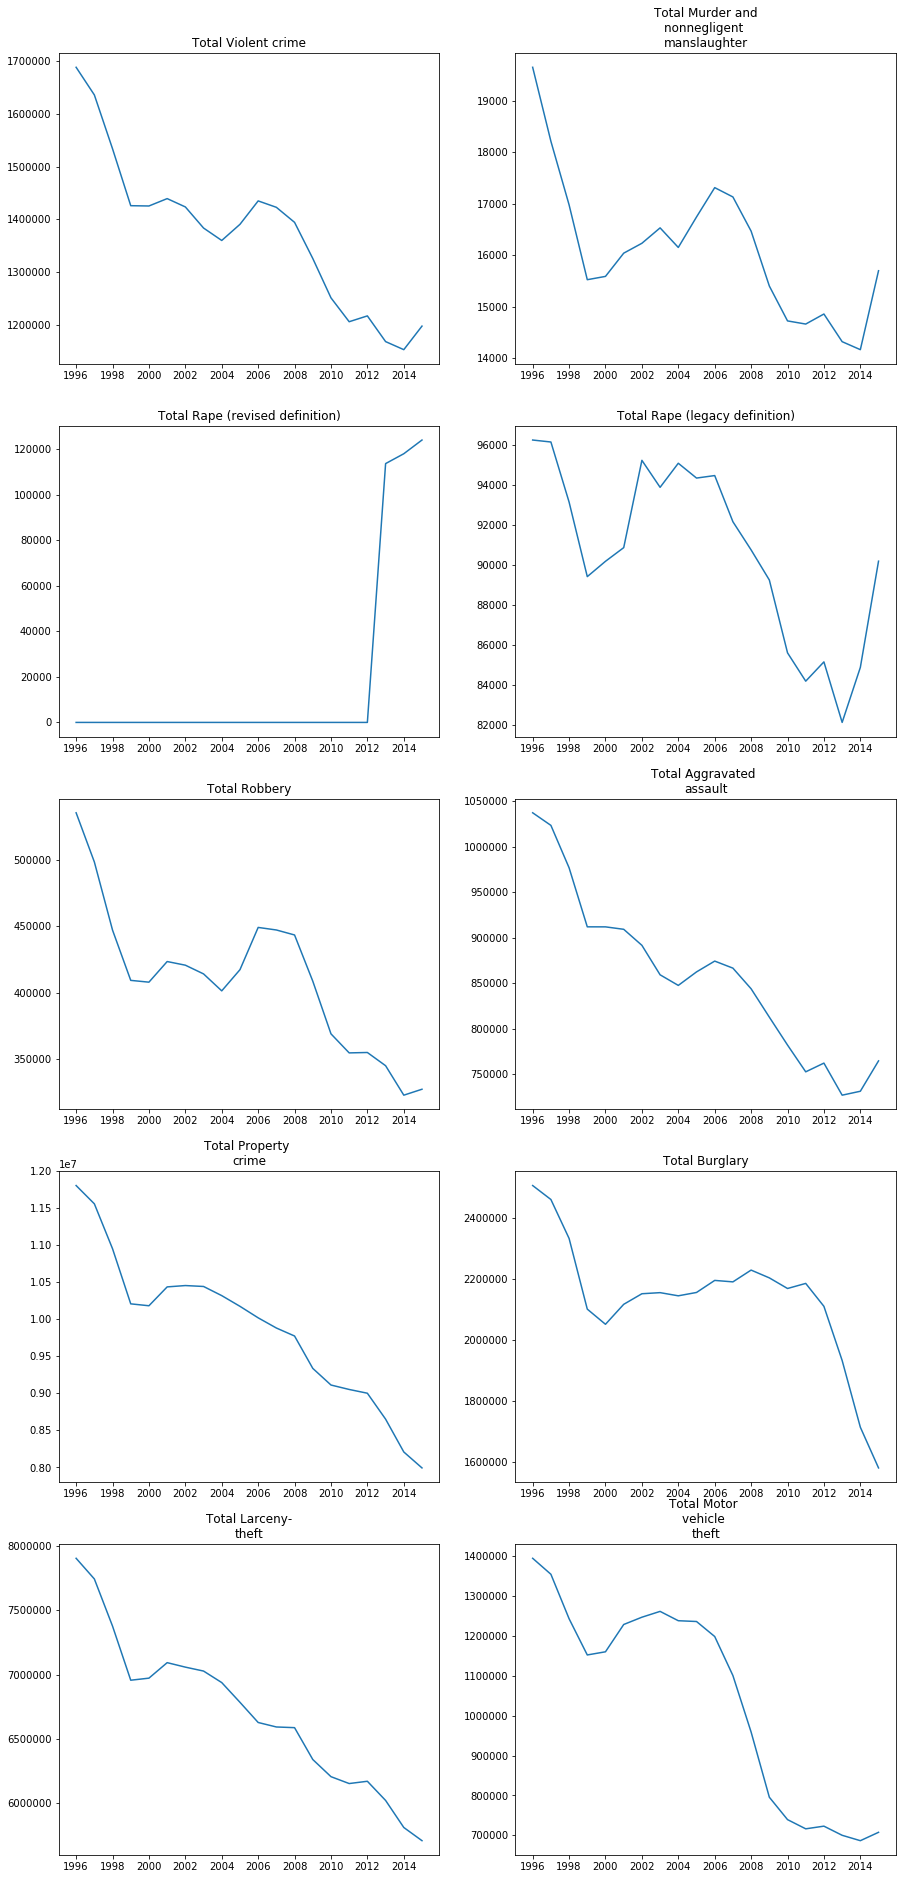

In [41]:
total_crime_plot(col_list)

From these plot is looks like the total crimes for each specific crime is decreasing. Interestingly for murder, assualt, theft the total spikes up during the 2006-2008 period. Vehicle theft shows a large drop during the 2008-2016 period.

In [42]:

rate_list= list(data)
rate_list.remove('Population')
rate_list.remove('Year') 
rate_list.remove('Total Crime Rate')
rate_list

['Violent crime',
 'Violent \ncrime \nrate ',
 'Murder and\nnonnegligent \nmanslaughter',
 'Murder and \nnonnegligent \nmanslaughter \nrate ',
 'Rape (revised definition)',
 'Rape (revised definition) rate',
 'Rape (legacy definition)',
 'Rape (legacy definition) rate',
 'Robbery',
 'Robbery \nrate ',
 'Aggravated \nassault',
 'Aggravated \nassault rate ',
 'Property \ncrime',
 'Property \ncrime \nrate ',
 'Burglary',
 'Burglary \nrate ',
 'Larceny-\ntheft',
 'Larceny-\ntheft rate ',
 'Motor \nvehicle \ntheft',
 'Motor \nvehicle \ntheft \nrate ',
 'Total Crime']

In [43]:
for col in rate_list:
     if 'rate' not in col:
        rate_list.remove(col)
        
rate_list


['Violent \ncrime \nrate ',
 'Murder and \nnonnegligent \nmanslaughter \nrate ',
 'Rape (revised definition) rate',
 'Rape (legacy definition) rate',
 'Robbery \nrate ',
 'Aggravated \nassault rate ',
 'Property \ncrime \nrate ',
 'Burglary \nrate ',
 'Larceny-\ntheft rate ',
 'Motor \nvehicle \ntheft \nrate ']

In [44]:
def total_crime_rate_plot(rate_list):
    count = 1
    plt.figure(figsize=(20,90))
    for col in rate_list:
            plt.subplot(6 ,2,count)
            plt.title("Total "+col)
            plt.plot(data.pivot_table(col, index='Year', aggfunc=sum))
            count = 1 + count       
        

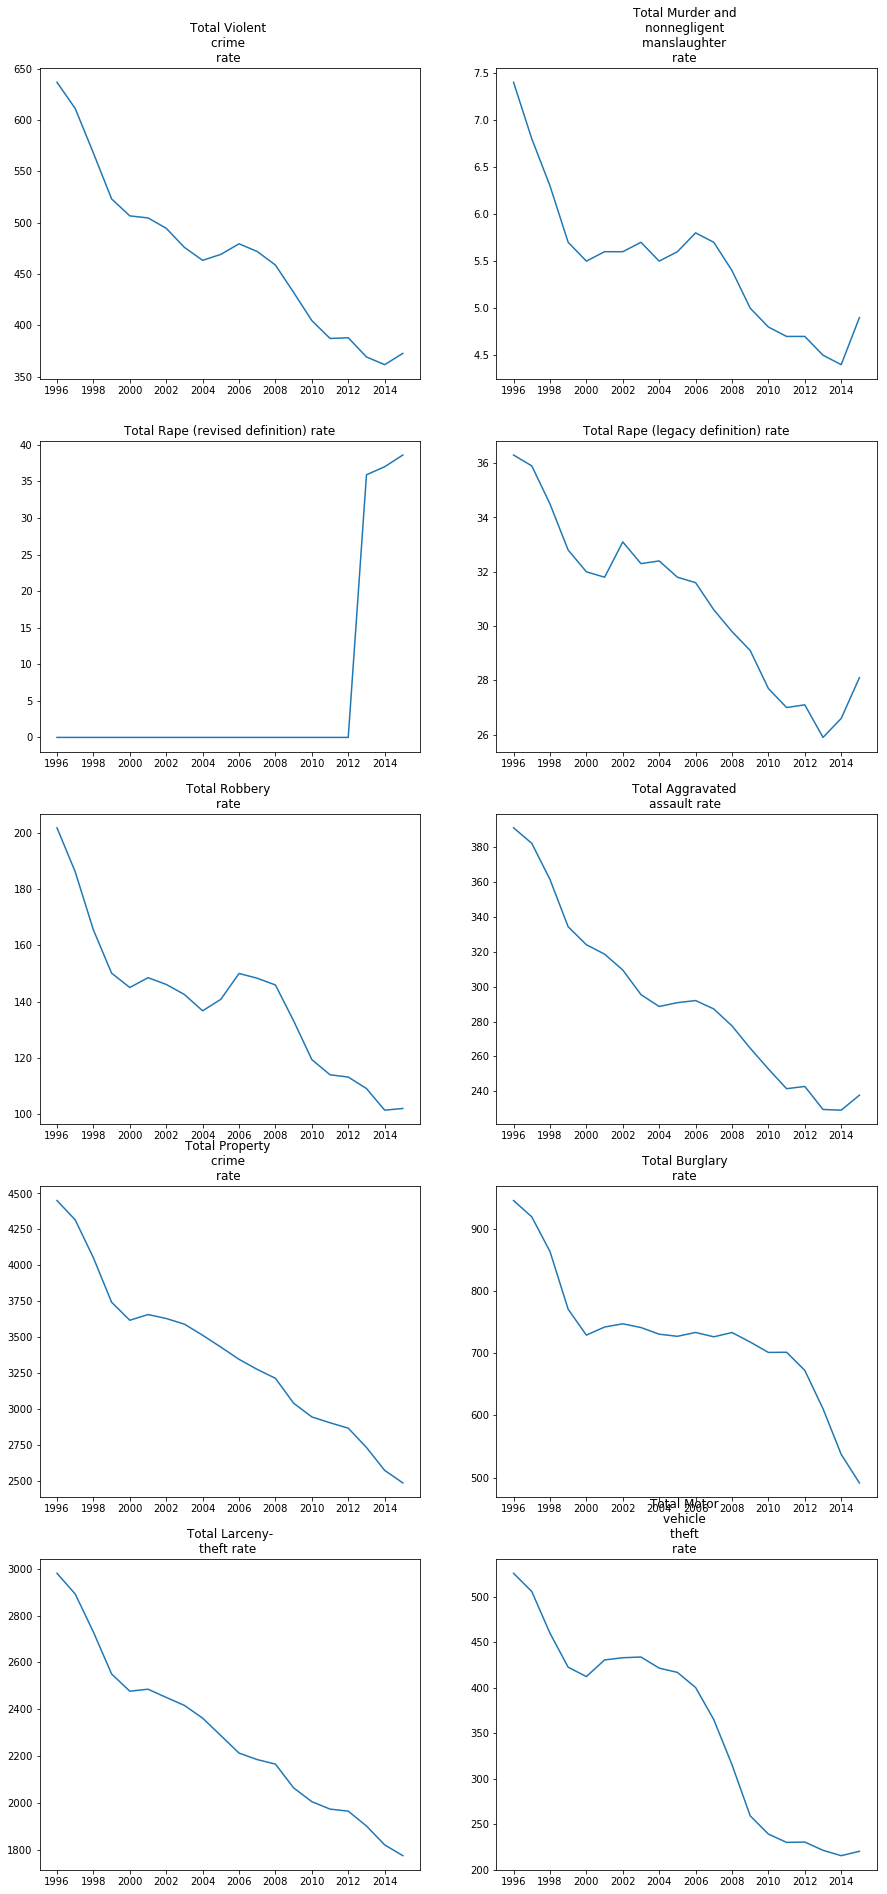

In [45]:

total_crime_plot(rate_list)

Thses plot are almost identical to the previous plots for the total of crimes committed. Therefore we can't draw anything new frome this information.

Let's take a look at rape (revised definition and legacy defintion). The revised definition is much broader and includes victims of all genders and acknowledgers other forms of sexual assualt while the legacy definition is quite limited and only includes female victims and one form of sexual assualt. Since the revised deinition has only been introduced since 2013 onwards we only have a small amount of data to analyse.

In [46]:
#create a dataframe comparing the amount of rape cases for both definitions during 2013-2015
ind=[17,18,19]
cols=[6,8]
group = data.iloc[ind,cols]

In [47]:
group

,Rape (revised definition),Rape (legacy definition)
17,113695.0,82109.0
18,118027.0,84864.0
19,124047.0,90185.0


We have a slice of the dataframe comparing the number of rapes recorded using the revised definition vs the legacy definition. Let's create a new column for this specific dataframe called "Difference". 

In [48]:
group['Difference'] = group['Rape (revised definition)']-group['Rape (legacy definition)']

In [49]:
group

,Rape (revised definition),Rape (legacy definition),Difference
17,113695.0,82109.0,31586.0
18,118027.0,84864.0,33163.0
19,124047.0,90185.0,33862.0


From this new column it seems like there is a substantial difference between the two. From examination of the difference column we can see that the majority of the victims in recorded rapes are women. Based on the difference as well we can see that a quarter of victims in recorded rape cases identify with a gender other than female and/or have been raped outside the legacy defintion of rape. This is qutie distressing as it means that a substantial number of what would now be considered rape cases where not acknowledged in their brutality until 2013 resulting in a gross injustice towards the victims.

Using this result we can create a new column estimating the amount of rapes under the revised edition that occured before 2013. 



Now we create a new column containing the the estimated rape cases. This is calculated by adding the average distance to the amount of rape cases under the legacy definition.

In [50]:
data["Estimated Rapes(rev)"] = data['Rape (legacy definition)'] + random.randrange(31586.0, 33862.0)

In [51]:
data

,Year,Population,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition),Rape (revised definition) rate,Rape (legacy definition),Rape (legacy definition) rate,...,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate,Total Crime,Total Crime Rate,Estimated Rapes(rev)
0,1996-01-01,265228572.0,1688540.0,636.6,19645,7.4,0.0,0.0,96252.0,36.3,...,4451.0,2506400.0,945.0,7904685.0,2980.3,1394238.0,525.7,26987726.0,10175.271011,129949.0
1,1997-01-01,267783607.0,1636096.0,611.0,18208,6.8,0.0,0.0,96153.0,35.9,...,4316.3,2460526.0,918.8,7743760.0,2891.8,1354189.0,505.7,26389142.0,9854.651782,129850.0
2,1998-01-01,270248003.0,1533887.0,567.6,16974,6.3,0.0,0.0,93144.0,34.5,...,4052.5,2332735.0,863.2,7376311.0,2729.5,1242781.0,459.9,24971428.0,9240.189649,126841.0
3,1999-01-01,272690813.0,1426044.0,523.0,15522,5.7,0.0,0.0,89411.0,32.8,...,3743.6,2100739.0,770.4,6955520.0,2550.7,1152075.0,422.5,23268756.0,8533.017942,123108.0
4,2000-01-01,281421906.0,1425486.0,506.5,15586,5.5,0.0,0.0,90178.0,32.0,...,3618.3,2050992.0,728.8,6971590.0,2477.3,1160002.0,412.2,23216140.0,8249.585233,123875.0
5,2001-01-01,285317559.0,1439480.0,504.5,16037,5.6,0.0,0.0,90863.0,31.8,...,3658.1,2116531.0,741.8,7092267.0,2485.7,1228391.0,430.5,23753338.0,8325.228242,124560.0
6,2002-01-01,287973924.0,1423677.0,494.4,16229,5.6,0.0,0.0,95235.0,33.1,...,3630.6,2151252.0,747.0,7057379.0,2450.7,1246646.0,432.9,23757908.0,8250.020582,128932.0
7,2003-01-01,290788976.0,1383676.0,475.8,16528,5.7,0.0,0.0,93883.0,32.3,...,3591.2,2154834.0,741.0,7026802.0,2416.5,1261226.0,433.7,23653076.0,8134.103406,127580.0
8,2004-01-01,293656842.0,1360088.0,463.2,16148,5.5,0.0,0.0,95089.0,32.4,...,3514.1,2144446.0,730.3,6937089.0,2362.3,1237851.0,421.5,23358948.0,7954.504939,128786.0
9,2005-01-01,296507061.0,1390745.0,469.0,16740,5.6,0.0,0.0,94347.0,31.8,...,3431.5,2155448.0,726.9,6783447.0,2287.8,1235859.0,416.8,23130998.0,7801.162617,128044.0


Now we just have to change the last 3 cells to the actual number of recorded rape cases and we can analyse this further.

In [52]:
#iterates through last few rows matching the values to that of the rape cases under the revised definition
for i in range(17,20):
    data.set_value(i,'Estimated Rapes(rev)', data.iloc[i,6] )
    i +=1


In [53]:
data

,Year,Population,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (revised definition),Rape (revised definition) rate,Rape (legacy definition),Rape (legacy definition) rate,...,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate,Total Crime,Total Crime Rate,Estimated Rapes(rev)
0,1996-01-01,265228572.0,1688540.0,636.6,19645,7.4,0.0,0.0,96252.0,36.3,...,4451.0,2506400.0,945.0,7904685.0,2980.3,1394238.0,525.7,26987726.0,10175.271011,129949.0
1,1997-01-01,267783607.0,1636096.0,611.0,18208,6.8,0.0,0.0,96153.0,35.9,...,4316.3,2460526.0,918.8,7743760.0,2891.8,1354189.0,505.7,26389142.0,9854.651782,129850.0
2,1998-01-01,270248003.0,1533887.0,567.6,16974,6.3,0.0,0.0,93144.0,34.5,...,4052.5,2332735.0,863.2,7376311.0,2729.5,1242781.0,459.9,24971428.0,9240.189649,126841.0
3,1999-01-01,272690813.0,1426044.0,523.0,15522,5.7,0.0,0.0,89411.0,32.8,...,3743.6,2100739.0,770.4,6955520.0,2550.7,1152075.0,422.5,23268756.0,8533.017942,123108.0
4,2000-01-01,281421906.0,1425486.0,506.5,15586,5.5,0.0,0.0,90178.0,32.0,...,3618.3,2050992.0,728.8,6971590.0,2477.3,1160002.0,412.2,23216140.0,8249.585233,123875.0
5,2001-01-01,285317559.0,1439480.0,504.5,16037,5.6,0.0,0.0,90863.0,31.8,...,3658.1,2116531.0,741.8,7092267.0,2485.7,1228391.0,430.5,23753338.0,8325.228242,124560.0
6,2002-01-01,287973924.0,1423677.0,494.4,16229,5.6,0.0,0.0,95235.0,33.1,...,3630.6,2151252.0,747.0,7057379.0,2450.7,1246646.0,432.9,23757908.0,8250.020582,128932.0
7,2003-01-01,290788976.0,1383676.0,475.8,16528,5.7,0.0,0.0,93883.0,32.3,...,3591.2,2154834.0,741.0,7026802.0,2416.5,1261226.0,433.7,23653076.0,8134.103406,127580.0
8,2004-01-01,293656842.0,1360088.0,463.2,16148,5.5,0.0,0.0,95089.0,32.4,...,3514.1,2144446.0,730.3,6937089.0,2362.3,1237851.0,421.5,23358948.0,7954.504939,128786.0
9,2005-01-01,296507061.0,1390745.0,469.0,16740,5.6,0.0,0.0,94347.0,31.8,...,3431.5,2155448.0,726.9,6783447.0,2287.8,1235859.0,416.8,23130998.0,7801.162617,128044.0


Let's plot the estimated number of rape cases under the revised definition.

In [54]:
estimate = data.pivot_table('Estimated Rapes(rev)', index='Year', aggfunc=sum)
estimate.head()

Year
1996-01-01    129949.0
1997-01-01    129850.0
1998-01-01    126841.0
1999-01-01    123108.0
2000-01-01    123875.0
Name: Estimated Rapes(rev), dtype: float64

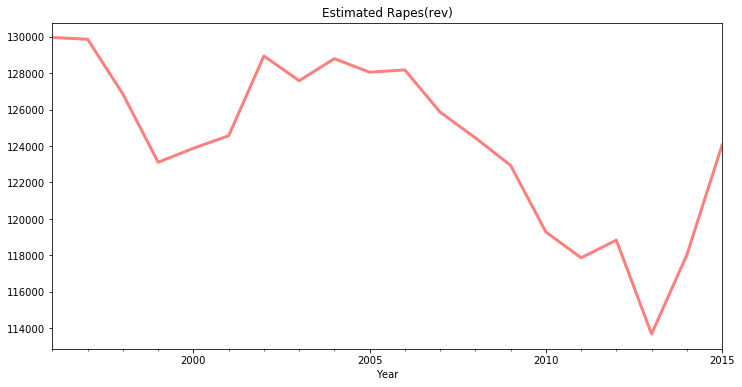

In [55]:
estimate.plot(figsize=(12, 6), title='Estimated Rapes(rev)', lw=3, color=( 'r'), alpha=0.5, )

It seems like the occurance of this crime using the estimated values is in a state flux. It decreases during the late 90s only for an incease in the early 2000s and remains at an almost steady rate for the mid 2000s. From 2007 it seems to decrease only for it to spike up around 2013.

Let's compare the number of estimated rape cases under the revised definition  agaisnt the rape cases under the legacy defintion.

In [56]:
dfy = data.iloc[::,[0,24]] #create a dataframe of estimated cases according the year

In [57]:
dfy

,Year,Estimated Rapes(rev)
0,1996-01-01,129949.0
1,1997-01-01,129850.0
2,1998-01-01,126841.0
3,1999-01-01,123108.0
4,2000-01-01,123875.0
5,2001-01-01,124560.0
6,2002-01-01,128932.0
7,2003-01-01,127580.0
8,2004-01-01,128786.0
9,2005-01-01,128044.0


In [58]:
dfr = data.iloc[::,[0,8]] #same as above but for legacy definition cases

In [59]:
dfr

,Year,Rape (legacy definition)
0,1996-01-01,96252.0
1,1997-01-01,96153.0
2,1998-01-01,93144.0
3,1999-01-01,89411.0
4,2000-01-01,90178.0
5,2001-01-01,90863.0
6,2002-01-01,95235.0
7,2003-01-01,93883.0
8,2004-01-01,95089.0
9,2005-01-01,94347.0


In [60]:
dfR =pd.concat([dfy, dfr], axis=0).fillna(0) #stack the two frames on top of each other
dfR

,Estimated Rapes(rev),Rape (legacy definition),Year
0,129949.0,0.0,1996-01-01
1,129850.0,0.0,1997-01-01
2,126841.0,0.0,1998-01-01
3,123108.0,0.0,1999-01-01
4,123875.0,0.0,2000-01-01
5,124560.0,0.0,2001-01-01
6,128932.0,0.0,2002-01-01
7,127580.0,0.0,2003-01-01
8,128786.0,0.0,2004-01-01
9,128044.0,0.0,2005-01-01


In [61]:
#create a new column containing what definition each rape case is under
dfR['Definition']= 0
dfR.iloc[:-1:,3] = 'Revised definition'
dfR.iloc[20::,3] = 'Legacy definition'
dfR

,Estimated Rapes(rev),Rape (legacy definition),Year,Definition
0,129949.0,0.0,1996-01-01,Revised definition
1,129850.0,0.0,1997-01-01,Revised definition
2,126841.0,0.0,1998-01-01,Revised definition
3,123108.0,0.0,1999-01-01,Revised definition
4,123875.0,0.0,2000-01-01,Revised definition
5,124560.0,0.0,2001-01-01,Revised definition
6,128932.0,0.0,2002-01-01,Revised definition
7,127580.0,0.0,2003-01-01,Revised definition
8,128786.0,0.0,2004-01-01,Revised definition
9,128044.0,0.0,2005-01-01,Revised definition


In [62]:

#merge the number of cases into a new column called "No.Cases" and remove the left over columns
dfR= dfR.rename(columns={'Estimated Rapes(rev)': 'No.Cases'})
dfR.iloc[20::,0]=dfR.iloc[20::,1]

dfR = dfR.drop('Rape (legacy definition)', 1)
dfR

,No.Cases,Year,Definition
0,129949.0,1996-01-01,Revised definition
1,129850.0,1997-01-01,Revised definition
2,126841.0,1998-01-01,Revised definition
3,123108.0,1999-01-01,Revised definition
4,123875.0,2000-01-01,Revised definition
5,124560.0,2001-01-01,Revised definition
6,128932.0,2002-01-01,Revised definition
7,127580.0,2003-01-01,Revised definition
8,128786.0,2004-01-01,Revised definition
9,128044.0,2005-01-01,Revised definition


In [63]:
#create plot of the total number of cases for each definition in one figure
cases = dfR.pivot_table('No.Cases', index='Year', columns='Definition', aggfunc=sum)
cases.head()

Definition,Legacy definition,Revised definition
Year,,
1996-01-01,96252.0,129949.0
1997-01-01,96153.0,129850.0
1998-01-01,93144.0,126841.0
1999-01-01,89411.0,123108.0
2000-01-01,90178.0,123875.0


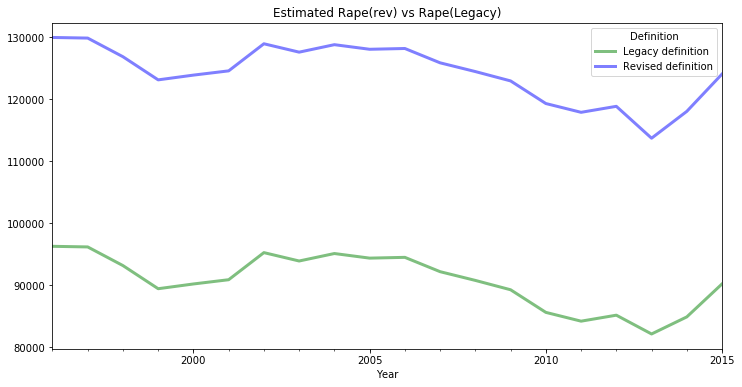

In [64]:
cases.plot(figsize=(12, 6), title="Estimated Rape(rev) vs Rape(Legacy)", lw=3, color=( 'g','b'), alpha=0.5);

The plot of the estimated cases for the estimated cases is, as suspected, the same shape as the plot of the legacy definition cases with the only difference being that it is shifted up in the figure. This tells us that it is very likely that there was a lot more rapes that were committed prior to 2013. This means the victims did not recieve the justice they deserved.

# Top ten years for each crime

Let's look at the top ten years for each crime. Note we will be disregarding the number of cases for rape under the revised definition since we don't have enough data to calculate the top ten. A databases will be constructed for the top ten of each crime.

In [65]:
col_list

['Violent crime',
 'Murder and\nnonnegligent \nmanslaughter',
 'Rape (revised definition)',
 'Rape (legacy definition)',
 'Robbery',
 'Aggravated \nassault',
 'Property \ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor \nvehicle \ntheft']

In [66]:
len(col_list) #number of dataframes we need to create

10

In [67]:
vc10 = data.sort_values(by=col_list[0], ascending=False).reset_index()[['Year', col_list[0]]].head(10) 
vc10


,Year,Violent crime
0,1996-01-01,1688540.0
1,1997-01-01,1636096.0
2,1998-01-01,1533887.0
3,2001-01-01,1439480.0
4,2006-01-01,1435123.0
5,1999-01-01,1426044.0
6,2000-01-01,1425486.0
7,2002-01-01,1423677.0
8,2007-01-01,1422970.0
9,2008-01-01,1394461.0


In [68]:
m10 = data.sort_values(by=col_list[1], ascending=False).reset_index()[['Year', col_list[1]]].head(10)
m10

,Year,Murder and nonnegligent manslaughter
0,1996-01-01,19645
1,1997-01-01,18208
2,2006-01-01,17309
3,2007-01-01,17128
4,1998-01-01,16974
5,2005-01-01,16740
6,2003-01-01,16528
7,2008-01-01,16465
8,2002-01-01,16229
9,2004-01-01,16148


In [69]:
rrl10 = data.sort_values(by=col_list[3], ascending=False).reset_index()[['Year', col_list[3]]].head(10)
rrl10

,Year,Rape (legacy definition)
0,1996-01-01,96252.0
1,1997-01-01,96153.0
2,2002-01-01,95235.0
3,2004-01-01,95089.0
4,2006-01-01,94472.0
5,2005-01-01,94347.0
6,2003-01-01,93883.0
7,1998-01-01,93144.0
8,2007-01-01,92160.0
9,2001-01-01,90863.0


In [70]:
r1 = data.sort_values(by=col_list[4], ascending=False).reset_index()[['Year', col_list[4]]].head(10)
r1

,Year,Robbery
0,1996-01-01,535594.0
1,1997-01-01,498534.0
2,2006-01-01,449246.0
3,2007-01-01,447324.0
4,1998-01-01,447186.0
5,2008-01-01,443563.0
6,2001-01-01,423557.0
7,2002-01-01,420806.0
8,2005-01-01,417438.0
9,2003-01-01,414235.0


In [71]:
aa10 = data.sort_values(by=col_list[5], ascending=False).reset_index()[['Year', col_list[5]]].head(10)
aa10

,Year,Aggravated assault
0,1996-01-01,1037049.0
1,1997-01-01,1023201.0
2,1998-01-01,976583.0
3,1999-01-01,911740.0
4,2000-01-01,911706.0
5,2001-01-01,909023.0
6,2002-01-01,891407.0
7,2006-01-01,874096.0
8,2007-01-01,866358.0
9,2005-01-01,862220.0


In [72]:
p10 = data.sort_values(by=col_list[6], ascending=False).reset_index()[['Year', col_list[6]]].head(10)
p10

,Year,Property crime
0,1996-01-01,11805323.0
1,1997-01-01,11558475.0
2,1998-01-01,10951827.0
3,2002-01-01,10455277.0
4,2003-01-01,10442862.0
5,2001-01-01,10437189.0
6,2004-01-01,10319386.0
7,1999-01-01,10208334.0
8,2000-01-01,10182584.0
9,2005-01-01,10174754.0


In [73]:
b10 = data.sort_values(by=col_list[7], ascending=False).reset_index()[['Year', col_list[7]]].head(10)
b10

,Year,Burglary
0,1996-01-01,2506400.0
1,1997-01-01,2460526.0
2,1998-01-01,2332735.0
3,2008-01-01,2228887.0
4,2009-01-01,2203313.0
5,2006-01-01,2194993.0
6,2007-01-01,2190198.0
7,2011-01-01,2185140.0
8,2010-01-01,2168459.0
9,2005-01-01,2155448.0


In [74]:
lt10 = data.sort_values(by=col_list[8], ascending=False).reset_index()[['Year', col_list[8]]].head(10)
lt10

,Year,Larceny- theft
0,1996-01-01,7904685.0
1,1997-01-01,7743760.0
2,1998-01-01,7376311.0
3,2001-01-01,7092267.0
4,2002-01-01,7057379.0
5,2003-01-01,7026802.0
6,2000-01-01,6971590.0
7,1999-01-01,6955520.0
8,2004-01-01,6937089.0
9,2005-01-01,6783447.0


In [75]:
mt10 = data.sort_values(by=col_list[9], ascending=False).reset_index()[['Year', col_list[9]]].head(10)
mt10

,Year,Motor vehicle theft
0,1996-01-01,1394238.0
1,1997-01-01,1354189.0
2,2003-01-01,1261226.0
3,2002-01-01,1246646.0
4,1998-01-01,1242781.0
5,2004-01-01,1237851.0
6,2005-01-01,1235859.0
7,2001-01-01,1228391.0
8,2006-01-01,1198245.0
9,2000-01-01,1160002.0


Now that we have the top ten tables created we can see  which years appear in the top ten for each crime.

We can do this using an inner merge. Due to the multiple data frames this is going to be a complicated piece of code.

In [76]:
#create merge dataframes for every two top ten dataframes.
merg1 = pd.merge(vc10, m10, how='inner', on=['Year']) 
merg2 = pd.merge(rrl10, r1, how='inner', on=['Year'])
merg3 = pd.merge( aa10, p10, how='inner', on=['Year'])
merg4 = pd.merge( b10, lt10, how='inner', on=['Year'])
#merg5 = pd.merge( mt10, how='inner', on=['Year'])

In [77]:
#repeat process above 
merg12 = pd.merge(merg1, merg2, how='inner', on=['Year'])
merg34 = pd.merge(merg3, merg4, how='inner', on=['Year'])
merge1234 =pd.merge(merg12, merg34, how='inner', on=['Year'])
common_top_ten =pd.merge(merge1234, mt10, how='inner', on=['Year'])

In [78]:
common_top_ten

,Year,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,1996-01-01,1688540.0,19645,96252.0,535594.0,1037049.0,11805323.0,2506400.0,7904685.0,1394238.0
1,1997-01-01,1636096.0,18208,96153.0,498534.0,1023201.0,11558475.0,2460526.0,7743760.0,1354189.0
2,1998-01-01,1533887.0,16974,93144.0,447186.0,976583.0,10951827.0,2332735.0,7376311.0,1242781.0


From previous analysis it is unsurprising that 1996-1998 are the only years that appear in all the top ten dataframes. This makes sense considering the previous graphs in this analysis which indicate that crime has been decreasing.

# Percentage of Decrease

The last part of our analysis will look calculate the percentage of the decrease in crime rates for each crime. 

In [79]:
dec = pd.DataFrame() #create a dataframe for the decreases in crime

In [80]:
dec["Crime"] = rate_list
dec

,Crime
0,Violent \ncrime \nrate
1,Murder and \nnonnegligent \nmanslaughter \nrate
2,Rape (revised definition) rate
3,Rape (legacy definition) rate
4,Robbery \nrate
5,Aggravated \nassault rate
6,Property \ncrime \nrate
7,Burglary \nrate
8,Larceny-\ntheft rate
9,Motor \nvehicle \ntheft \nrate


In [81]:
#this function creates a list of the percentage decreases to place into the dataframe
def decrease(rate_list):
    d = []
    for rate in rate_list:
        d.append(((data.loc[0, rate] - data.loc[19, rate])/data.loc[0, rate])*100 ) 
    return d

In [82]:
dec['rate decrease'] = decrease(rate_list)
dec

C:\Users\PoyaH\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in double_scalars


,Crime,rate decrease
0,Violent \ncrime \nrate,41.470311
1,Murder and \nnonnegligent \nmanslaughter \nrate,33.783784
2,Rape (revised definition) rate,-inf
3,Rape (legacy definition) rate,22.589532
4,Robbery \nrate,49.529470
5,Aggravated \nassault rate,39.181586
6,Property \ncrime \nrate,44.124916
7,Burglary \nrate,48.000000
8,Larceny-\ntheft rate,40.428816
9,Motor \nvehicle \ntheft \nrate,58.112992


In [83]:
#calculates the decrease for rape under the revised definition
dec.iloc[2,1] =  (data.iloc[17, 7] - data.iloc[19, 7])/(data.iloc[17, 7])*100 


In [84]:
dec

,Crime,rate decrease
0,Violent \ncrime \nrate,41.470311
1,Murder and \nnonnegligent \nmanslaughter \nrate,33.783784
2,Rape (revised definition) rate,-7.520891
3,Rape (legacy definition) rate,22.589532
4,Robbery \nrate,49.529470
5,Aggravated \nassault rate,39.181586
6,Property \ncrime \nrate,44.124916
7,Burglary \nrate,48.000000
8,Larceny-\ntheft rate,40.428816
9,Motor \nvehicle \ntheft \nrate,58.112992


From examining this table it seems that crime has dropped by almost 50% during the 11 year period. The percentage decrease for rape (revised definition) is a negative value meaning its the only crime that is on the increase. This however is not solid result due to the small amount of data that I was able to analyse for that particular crime rate. 







<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 5. Results/Insights



The biggest insight gained from this analysis the decrease in crime rates. Over the 11 years period of 1996-2015 most crime rates decreased around the 50% mark. This is very encouraging. If we can study this decrease further and deduce what factors have resulted in this decrease then we can captilise on these factors thus resulting in a greater decrease in crime. This result bodes well for the quality of life for US citizens and these crime rates continue to decrease in this way we could potentially see an almost crime free USA given that we captilise on the factors that result in decreased crime.

Another insight gained is the examination of the number of rapes under the revised definition (I will refer to this as rape(rev)) compared to those under the legacy definition (rape(leg)). 
The definitions (as obtained from the FBI website are:

Legacy - the carnal knowledge of a female forcibly and against her will.
Revised -  Penetration, no matter how slight, of the vagina or anus with any body part or object, or oral penetration by a sex organ of another person, without the consent of the victim. Attempts or assaults to commit rape are also included.


It was quite disturbing to learn that it is highly possible that many more rapes than recorded occured due to the legacy definition being so limited. As I mentioned numerous times in my analysis, this means that a great number of rape victims did not recieve the justice they deserved as the sexual assualt they experienced did not match that of the legacy definition. The introduction of the revised definition has seen an increase in rape but this is not a solid result as new definition has only been in place for a few years. It would take a number of years, possibly a decade, to study the increase/decrease of rape cases under the revised definition.

The last insight that I gained was quite surprising to me. I initially thought that crimes such as murder and assualt would be the most prevalent crimes but from examining the two pie charts in the analysis they only made up a small part of the charts. Property crime, larceny-theft, and burglary were the most commited crimes. These three crimes all contain or are some form of theft! It seems like Americans enjoy stealing things! I also found it interesting that proportion of crimes in the pie chart for 1996 and 2015 were almost identical. This suggests that while crime rates are dropping the proportion of crimes being committed is still very much the same.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 6. In hindsight...



The most challenging part of the data analysis was creating plots from the dataframe. Most of my experience with creating plots from dataframes where from dataframes that did not contain numerical values. I had to do a lot of searching on googling to figure how to get my plots to look the way that I needed them to. I also found it initially challening to clean up the data. While the data was mostly ready to be worked with there a few spots where I had to do a little cleaning. Sometimes I wouldn't notice an issue with the dataset until I was a quarter into my analysis. Google ended up being my best friend and I was able to search for methods that would help clean the dataset so that it was ready to be used.

The main programming technique I used were the pandas methods. I also used a website stackoverflow.com which contained some helpful material for python programming. The notebooks and tests that we did in class also came in handy. I found myself reusing a lot of the code I used in the tests and in the notebooks for my analysis. 

I managed to reach most of the goals I wanted to but unfortunately I was not able to analyse the affect that leglislation and cultural changes have had on crime during 1996-2015. From the research I conducted I realsed that the big legal and cultural changes that resulted in the decrease in crime rates all happened right before 1996! Talk about bad luck! I was incredibly disappointed as that was the part of the project I was most looking forward. I read that central locking resulted in a decrease in car thefts and was hoping to analyse whether that was true, but was not able to find a specific time for when central locking became common place. I had to let this go and focus on the others. The goals I added during the analysis were estimatating the number of rape cases under the revised definition, examining the top ten years for each crime and the percentage decreases in crime rates.

As I mentioned above the most surprising insight I gained was the aggressive crimes such as assualt and murder were among the least committed crimes and that crimes involving theft made up the most committed crimes. I initially thought this would be the other way around. I was also surprised to learn that there were two definitions of rape and that because of this it's possible that a lot more rapes occured before the new definition was introduced.

If I was to conduct this project again I would probably do it the same way with the only difference being it would be without the pressure of a deadline. If someone was to work on this dataset I would suggest writing out your goals before hand and adding to them as you go deeper in your analysis. You'll be surprised at what you'll find while looking for something else. Be sure to note all your results as you go as well. I would also try to consult with friends who know python better than I do. One thing I would change is I would use a bar graph instead of a pie chart. I tried to do this but I could not get the code right so I decided a pie chart was the next best option.

I believe I could improve this analysis by dedicating more time to it. More time would allow me to play around with the data a bit more and to research different python methods so that I could turn in a more detailed analysis. Also I would like to find a similar dataset with different year ranges and compare the results from that analysis to this one. Maybe even combine both datasets into one big dataset and perform a similar analysis on that! The 80s is especially an interesting period as the crack coaine epidemic occured then. Perhaps that could be something to do during the holidays!

# References





BI. 2017. FBI — Rape. [ONLINE] Available at: https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/violent-crime/rape. [Accessed 3rd June 2017].

NBC News. 2017. An Inside Look at the System That Cut Crime in New York By 75 Percent - NBC News. [ONLINE] Available at: http://www.nbcnews.com/news/us-news/inside-look-system-cut-crime-new-york-75-percent-n557031. [Accessed 13th June 2017].